In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# List of companies
companies = ["nikola", "adani", "block", "kandi", "lordstown"]

for company in companies:
    search_term = company
    # Get user input for the URL
    url = f'https://hindenburgresearch.com/{search_term}'
    response = requests.get(url)
    # Send a GET request to the URL and parse the HTML content
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract all headers and their related paragraphs
    headers = {}
    current_header = None
    for element in soup.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'p']):
        if element.name.startswith('h'):
            # If a new header is found, update the current header
            current_header = element.text.strip()
            headers[current_header] = []
        elif current_header is not None:
            # If a paragraph is found, add it to the list of paragraphs for the current header
            headers[current_header].append(element.text.strip())

    # Create a list of dictionaries with the title, summary and source information
    data = []
    for header, paragraphs in headers.items():
        data.append({
            'title': header,
            'summary': ' '.join(paragraphs),
            'source': url
        })

    # Create a dataframe from the list of dictionaries
    df = pd.DataFrame(data)

    # Print the dataframe
    print(f"Search results for {company.capitalize()}:")
    print(df)
    print("\n")

Search results for Nikola:
                                                title  \
0   Nikola: How to Parlay An Ocean of Lies Into a ...   
1      GET OUR LATEST REPORTS DELIVERED TO YOUR INBOX   
2                                       (NASDAQ:NKLA)   
3   Background: A Relentless Tesla Rally Pressured...   
4   Background: GM Temporarily Staves Off Pressure...   
..                                                ...   
75  July 2009: Trevor Launched uPillar.com, a Webs...   
76  Former Employee: 80 Million Users Claim is “Ab...   
77  Disclosure: We are short shares of Nikola Corp...   
78                                   Legal Disclaimer   
79  2,243 thoughts on “Nikola: How to Parlay An Oc...   

                                              summary  \
0                                                       
1                                                       
2   Initial Disclosure: After extensive research, ...   
3   The underlying narrative for the electric vehi...   
4  

NameError: name 'df' is not defined

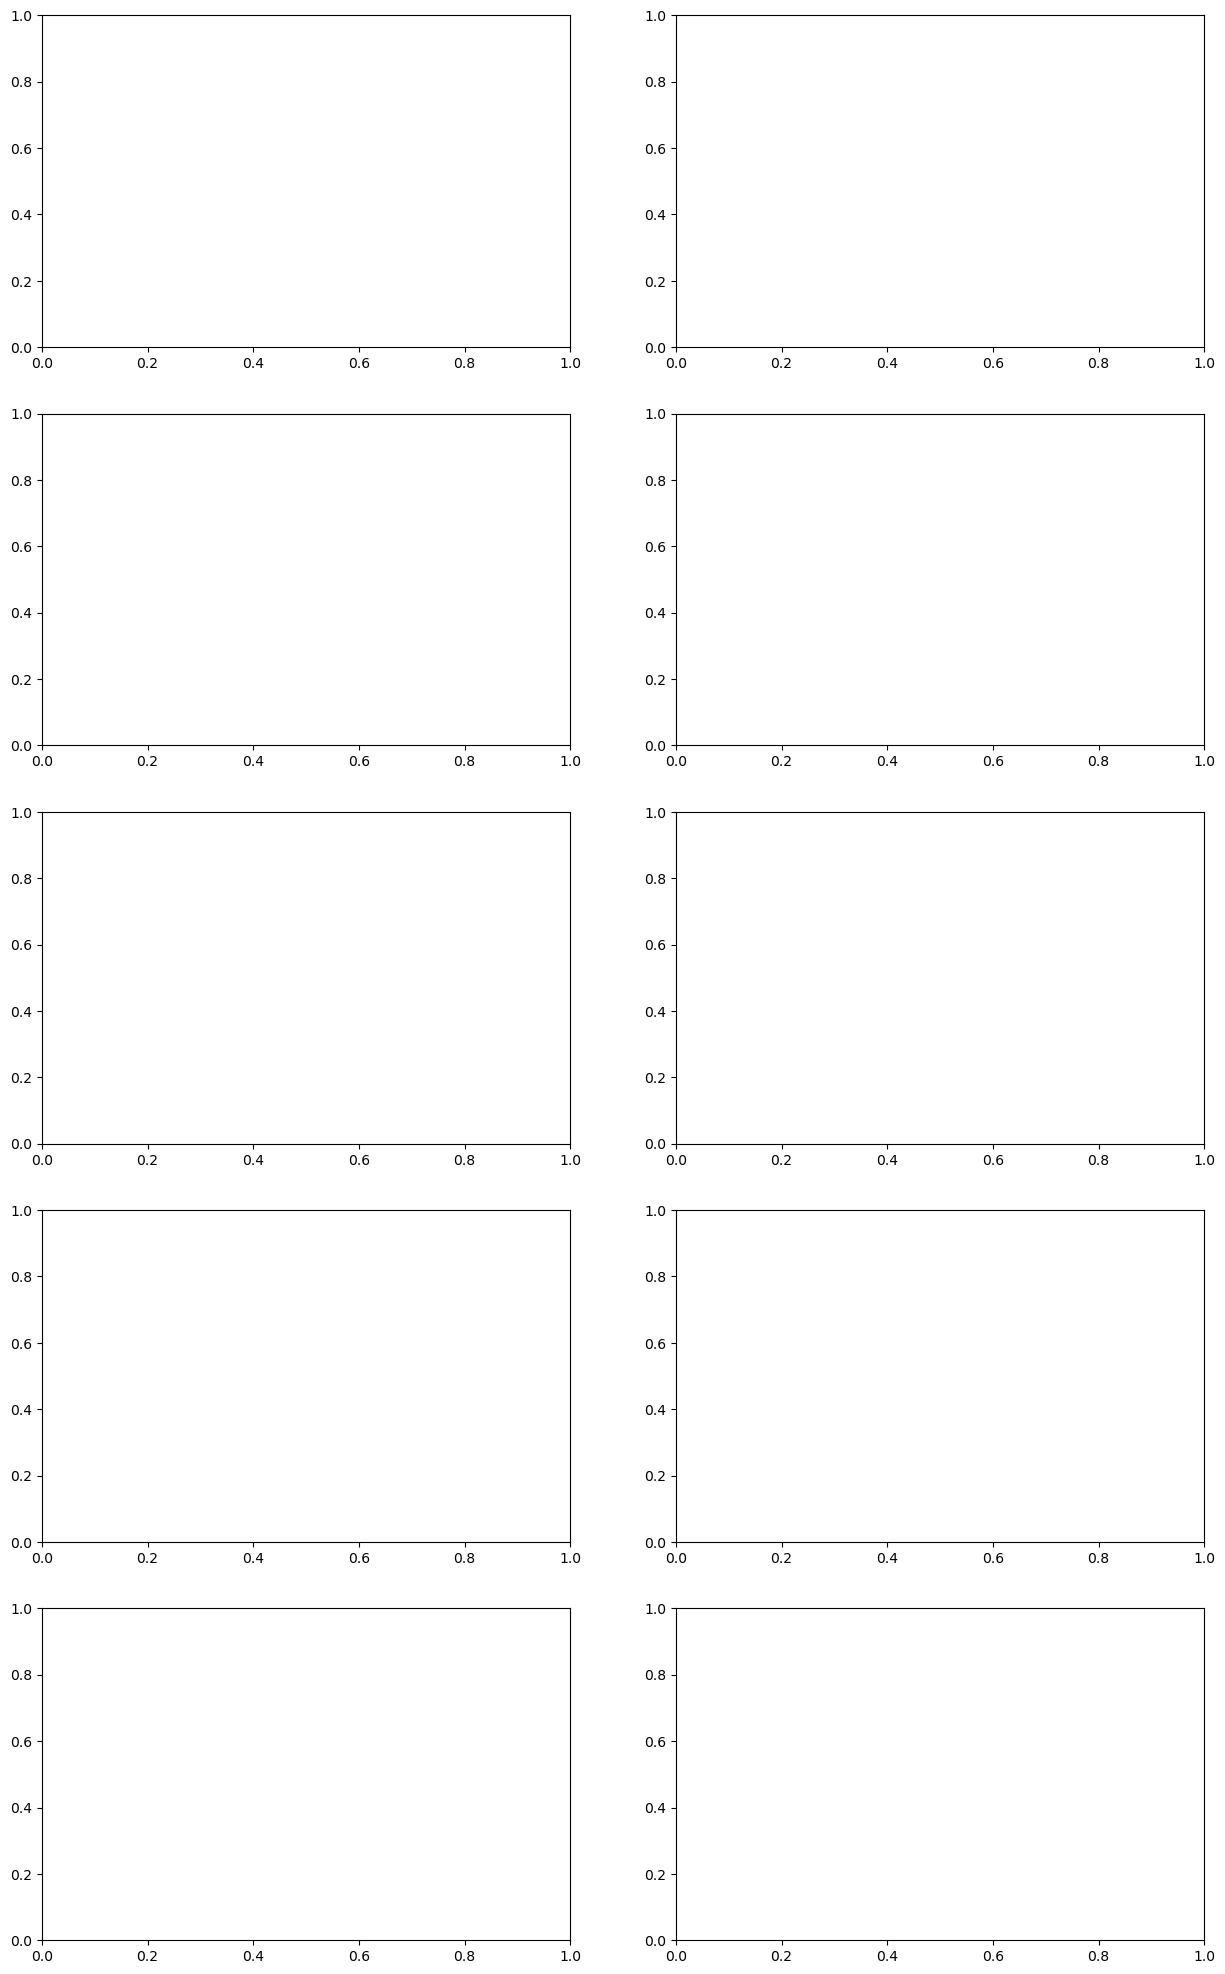

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# List of companies
companies = ["Nikola", "Adani", "Block", "Kandi", "Lordstown"]

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))

# Generate word clouds for each company
for i, company in enumerate(companies):
    # Subset the dataframe for the current company
    df_subset = df[df['company'] == company]

    # Combine the 'title' and 'summary' columns into one
    text = ' '.join(df_subset['title']) + ' ' + ' '.join(df_subset['summary'])

    # Generate a word cloud for the combined text
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud for the title column
    axs[i, 0].imshow(WordCloud(width=400, height=200, background_color='white').generate(' '.join(df_subset['title'])))
    axs[i, 0].axis('off')
    axs[i, 0].set_title(f'{company} - Word Cloud for Title Column')

    # Plot the word cloud for the summary column
    axs[i, 1].imshow(WordCloud(width=400, height=200, background_color='white').generate(' '.join(df_subset['summary'])))
    axs[i, 1].axis('off')
    axs[i, 1].set_title(f'{company} - Word Cloud for Summary Column')

plt.tight_layout()
plt.show()

In [31]:
df_1

,title,summary,source
0,NIKOLA VOLTERA ENTER DEFINITIVE STRATEGIC PART...,"Nikola Corporation (Nasdaq: NKLA), global lead...",Yahoo News
1,Carl Icahn's business empire became Hindenburg...,short seller's biggest bets past three years. ...,Yahoo News
2,WATTEV TAKE DELIVERY FIRST BATCH 14 NIKOLA TRE...,"Nikola Corporation (NASDAQ: NKLA), global lead...",Yahoo News
3,Nikola (NKLA) Report Q1 Earnings: What's Offing?,Zacks Consensus Estimate Nikola's (NKLA) loss ...,Yahoo News
4,ETHERO Truck + Energy Expands Territory Califo...,"""Making inventory, sales, service available cu...",Yahoo News
5,Gov. Newsom touts state’s transition renewable...,California Gov. Gavin Newsom touted progress s...,Yahoo News
6,Tom’s Truck Center Adds Nikola Class 8 Tre Sem...,"Tom’s Truck Center, commercial truck sales ser...",Yahoo News
7,"Eli Lilly, Livent, Super Micro Computer Big St...",U.S. stock futures traded higher morning. big ...,Yahoo News


In [32]:
df

,title,summary,source
0,nikola: parlay ocean lies partnership largest ...,,https://hindenburgresearch.com/Nikola
1,get latest reports delivered inbox,,https://hindenburgresearch.com/Nikola
2,(nasdaq:nkla),"initial disclosure: extensive research, taken ...",https://hindenburgresearch.com/Nikola
3,background: relentless tesla rally pressured g...,underlying narrative electric vehicle market 2...,https://hindenburgresearch.com/Nikola
4,background: gm temporarily staves pressure ana...,"morning september 8, 2020, nikola announced st...",https://hindenburgresearch.com/Nikola
...,...,...,...
75,"july 2009: trevor launched upillar.com, websit...",,https://hindenburgresearch.com/Nikola
76,former employee: 80 million users claim “absur...,trevor’s account rise business world follows “...,https://hindenburgresearch.com/Nikola
77,disclosure: short shares nikola corp (nasdaq:n...,,https://hindenburgresearch.com/Nikola
78,legal disclaimer,use hindenburg research’s research risk. event...,https://hindenburgresearch.com/Nikola


In [33]:
result = pd.concat([df_1, df], ignore_index=True)

In [34]:
result.head()

,title,summary,source
0,NIKOLA VOLTERA ENTER DEFINITIVE STRATEGIC PART...,"Nikola Corporation (Nasdaq: NKLA), global lead...",Yahoo News
1,Carl Icahn's business empire became Hindenburg...,short seller's biggest bets past three years. ...,Yahoo News
2,WATTEV TAKE DELIVERY FIRST BATCH 14 NIKOLA TRE...,"Nikola Corporation (NASDAQ: NKLA), global lead...",Yahoo News
3,Nikola (NKLA) Report Q1 Earnings: What's Offing?,Zacks Consensus Estimate Nikola's (NKLA) loss ...,Yahoo News
4,ETHERO Truck + Energy Expands Territory Califo...,"""Making inventory, sales, service available cu...",Yahoo News


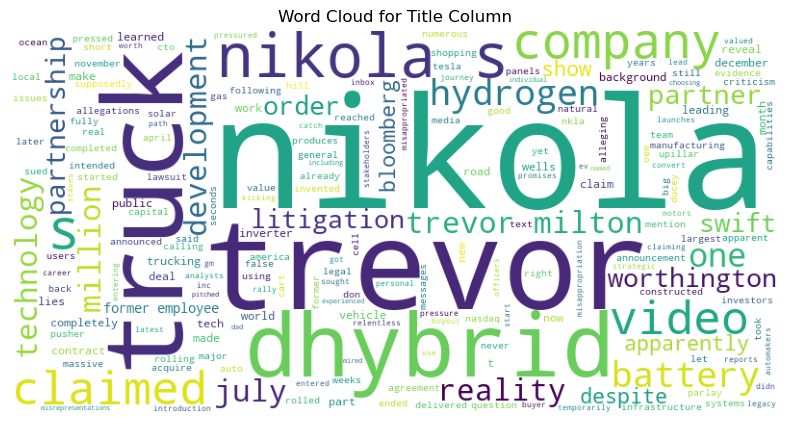

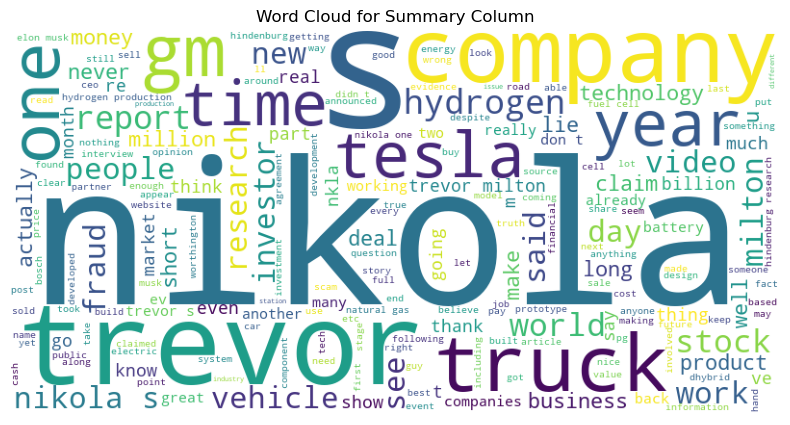

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Combine the 'title' and 'summary' columns into one
text = ' '.join(result['title']) + ' ' + ' '.join(result['summary'])

# Generate a word cloud for the combined text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud for the title column
plt.figure(figsize=(10, 5))
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['title'])))
plt.axis('off')
plt.title('Word Cloud for Title Column')
plt.show()

# Plot the word cloud for the summary column
plt.figure(figsize=(10, 5))
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['summary'])))
plt.axis('off')
plt.title('Word Cloud for Summary Column')
plt.show()

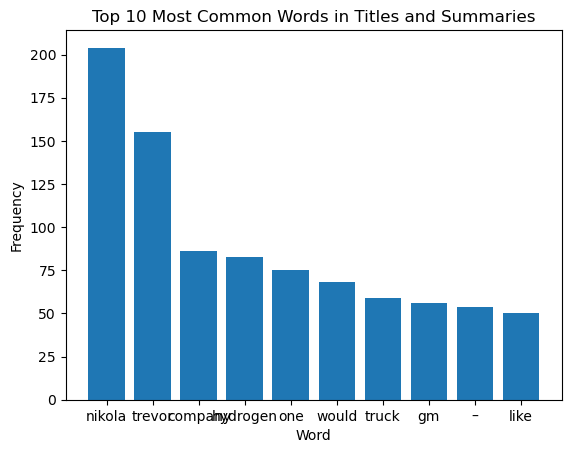

In [36]:
import matplotlib.pyplot as plt
from collections import Counter

# Concatenate title and summary columns into one string
text = ' '.join(result['title'].tolist() + result['summary'].tolist())

# Remove stop words
stop_words = ['the', 'and', 'of', 'in', 'to', 'a', 'that', 'for', 'is', 'on', 'with', 'it', 'this', 'as', 'an', 'be', 'by', 'from']
words = [word for word in text.split() if word.lower() not in stop_words]

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 10 most common words
top_words = word_counts.most_common(10)

# Create a bar plot of the top 10 words
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.title('Top 10 Most Common Words in Titles and Summaries')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()


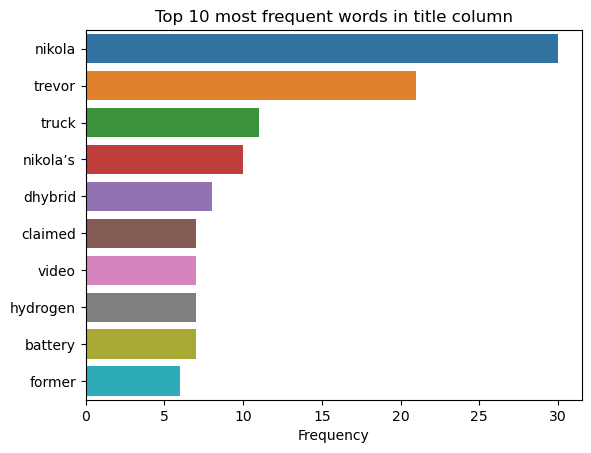

In [37]:
import pandas as pd
import seaborn as sns
from collections import Counter

# Create a list with all the words in the title column
all_title_words = [word for title in result['title'] for word in title.split()]

# Count the frequency of each word
title_word_freq = Counter(all_title_words)

# Get the top 10 most frequent words and their frequencies
top_title_words = title_word_freq.most_common(10)
x_title, y_title = zip(*top_title_words)

# Convert the lists to a pandas series
x_title = pd.Series(x_title)
y_title = pd.Series(y_title)

# Create a barplot with seaborn
sns.barplot(x=y_title, y=x_title)
plt.title('Top 10 most frequent words in title column')
plt.xlabel('Frequency')
plt.show()


In [38]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Get stop words and set up punctuation filter
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
extra_symbols = set(['‘', '’', '“', '”', '’s', '’t', '—', '–', '...'])

# Remove stop words and extra symbols from title column
result['title_clean'] = result['title'].apply(lambda x: ' '.join(word.lower() for word in word_tokenize(x) if word.lower() not in stop_words and word.lower() not in punctuation and word.lower() not in extra_symbols))

# Remove stop words and extra symbols from summary column
result['summary_clean'] = result['summary'].apply(lambda x: ' '.join(word.lower() for word in word_tokenize(x) if word.lower() not in stop_words and word.lower() not in punctuation and word.lower() not in extra_symbols))


In [39]:
result

,title,summary,source,title_clean,summary_clean
0,NIKOLA VOLTERA ENTER DEFINITIVE STRATEGIC PART...,"Nikola Corporation (Nasdaq: NKLA), global lead...",Yahoo News,nikola voltera enter definitive strategic part...,nikola corporation nasdaq nkla global leader z...
1,Carl Icahn's business empire became Hindenburg...,short seller's biggest bets past three years. ...,Yahoo News,carl icahn 's business empire became hindenbur...,short seller 's biggest bets past three years ...
2,WATTEV TAKE DELIVERY FIRST BATCH 14 NIKOLA TRE...,"Nikola Corporation (NASDAQ: NKLA), global lead...",Yahoo News,wattev take delivery first batch 14 nikola tre...,nikola corporation nasdaq nkla global leader z...
3,Nikola (NKLA) Report Q1 Earnings: What's Offing?,Zacks Consensus Estimate Nikola's (NKLA) loss ...,Yahoo News,nikola nkla report q1 earnings 's offing,zacks consensus estimate nikola 's nkla loss p...
4,ETHERO Truck + Energy Expands Territory Califo...,"""Making inventory, sales, service available cu...",Yahoo News,ethero truck energy expands territory california,`` making inventory sales service available cu...
...,...,...,...,...,...
83,"july 2009: trevor launched upillar.com, websit...",,https://hindenburgresearch.com/Nikola,july 2009 trevor launched upillar.com website ...,
84,former employee: 80 million users claim “absur...,trevor’s account rise business world follows “...,https://hindenburgresearch.com/Nikola,former employee 80 million users claim absurd ...,trevor account rise business world follows 2 m...
85,disclosure: short shares nikola corp (nasdaq:n...,,https://hindenburgresearch.com/Nikola,disclosure short shares nikola corp nasdaq nkla,
86,legal disclaimer,use hindenburg research’s research risk. event...,https://hindenburgresearch.com/Nikola,legal disclaimer,use hindenburg research research risk event hi...


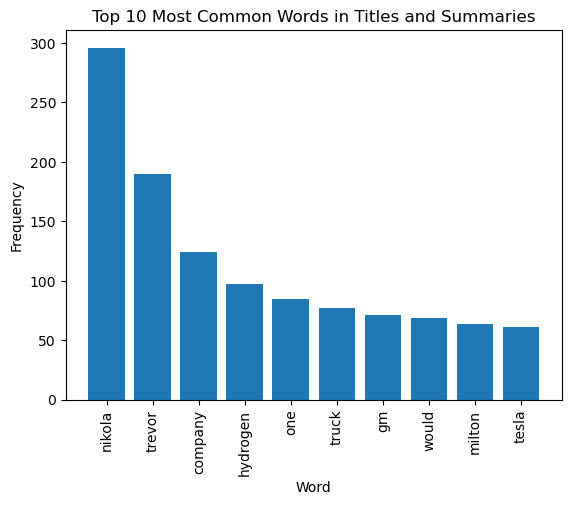

In [40]:
import matplotlib.pyplot as plt
from collections import Counter

# Concatenate title and summary columns into one string
text = ' '.join(result['title_clean'].tolist() + result['summary_clean'].tolist())

# Remove stop words
stop_words = ['the', 'and', 'of', 'in', 'to', 'a', 'that', 'for', 'is', 'on', 'with', 'it', 'this', 'as', 'an', 'be', 'by', 'from']
words = [word for word in text.split() if word.lower() not in stop_words]

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 10 most common words
top_words = word_counts.most_common(10)

# Create a bar plot of the top 10 words
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.title('Top 10 Most Common Words in Titles and Summaries')
plt.xlabel('Word')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()


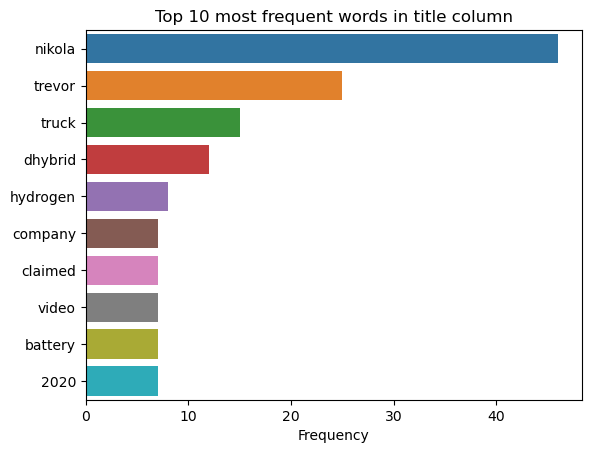

In [41]:
import pandas as pd
import seaborn as sns
from collections import Counter

# Create a list with all the words in the title column
all_title_words = [word for title in result['title_clean'] for word in title.split()]

# Count the frequency of each word
title_word_freq = Counter(all_title_words)

# Get the top 10 most frequent words and their frequencies
top_title_words = title_word_freq.most_common(10)
x_title, y_title = zip(*top_title_words)

# Convert the lists to a pandas series
x_title = pd.Series(x_title)
y_title = pd.Series(y_title)

# Create a barplot with seaborn
sns.barplot(x=y_title, y=x_title)
plt.title('Top 10 most frequent words in title column')
plt.xlabel('Frequency')
plt.show()


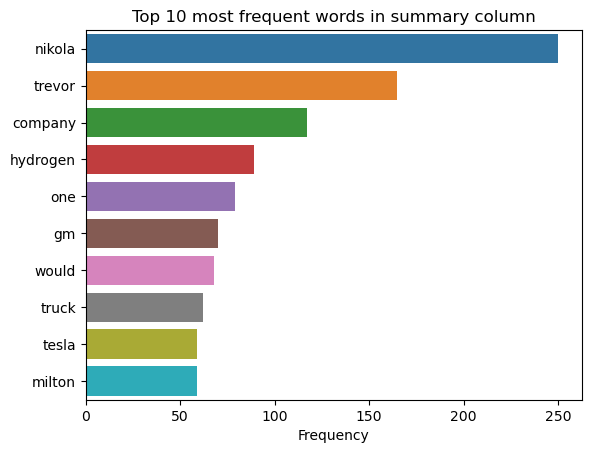

In [42]:
import pandas as pd
import seaborn as sns
from collections import Counter

# Create a list with all the words in the title column
all_summary_words = [word for title in result['summary_clean'] for word in title.split()]

# Count the frequency of each word
title_word_freq = Counter(all_summary_words)

# Get the top 10 most frequent words and their frequencies
top_title_words = title_word_freq.most_common(10)
x_title, y_title = zip(*top_title_words)

# Convert the lists to a pandas series
x_title = pd.Series(x_title)
y_title = pd.Series(y_title)

# Create a barplot with seaborn
sns.barplot(x=y_title, y=x_title)
plt.title('Top 10 most frequent words in summary column')
plt.xlabel('Frequency')
plt.show()


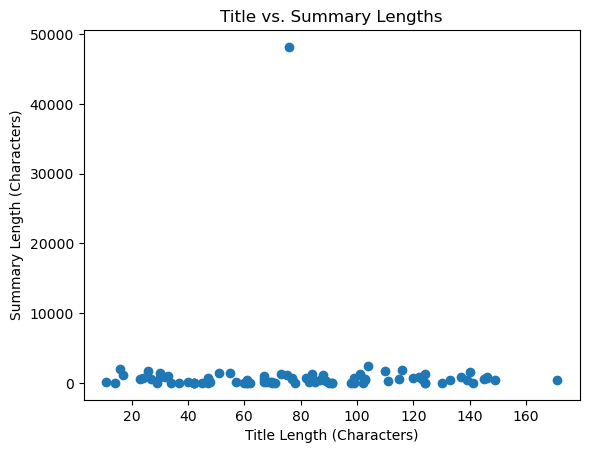

In [43]:
import matplotlib.pyplot as plt

title_lengths = result['title_clean'].str.len()
summary_lengths = result['summary_clean'].str.len()

fig, ax = plt.subplots()
ax.scatter(title_lengths, summary_lengths)
plt.title('Title vs. Summary Lengths')
plt.xlabel('Title Length (Characters)')
plt.ylabel('Summary Length (Characters)')
plt.show()


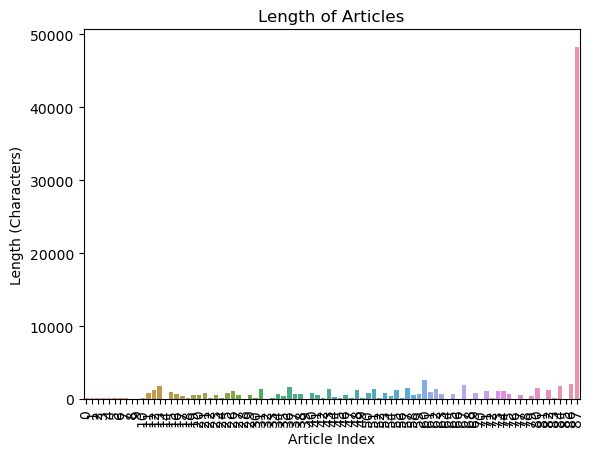

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

result['length'] = result['title_clean'].str.len() + result['summary_clean'].str.len()
sns.barplot(x=result.index, y='length', data=result)
plt.title('Length of Articles')
plt.xlabel('Article Index')
plt.xticks(rotation=90)
plt.ylabel('Length (Characters)')
plt.show()

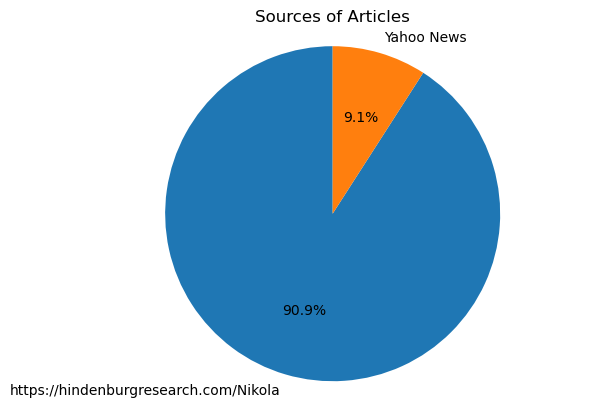

In [52]:
import matplotlib.pyplot as plt

source_counts = result['source'].value_counts()
labels = source_counts.index.tolist()
sizes = source_counts.values.tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sources of Articles')
plt.show()


In [53]:
result.head()

,title,summary,source,title_clean,summary_clean,length
0,NIKOLA VOLTERA ENTER DEFINITIVE STRATEGIC PART...,"Nikola Corporation (Nasdaq: NKLA), global lead...",Yahoo News,nikola voltera enter definitive strategic part...,nikola corporation nasdaq nkla global leader z...,166
1,Carl Icahn's business empire became Hindenburg...,short seller's biggest bets past three years. ...,Yahoo News,carl icahn 's business empire became hindenbur...,short seller 's biggest bets past three years ...,136
2,WATTEV TAKE DELIVERY FIRST BATCH 14 NIKOLA TRE...,"Nikola Corporation (NASDAQ: NKLA), global lead...",Yahoo News,wattev take delivery first batch 14 nikola tre...,nikola corporation nasdaq nkla global leader z...,185
3,Nikola (NKLA) Report Q1 Earnings: What's Offing?,Zacks Consensus Estimate Nikola's (NKLA) loss ...,Yahoo News,nikola nkla report q1 earnings 's offing,zacks consensus estimate nikola 's nkla loss p...,119
4,ETHERO Truck + Energy Expands Territory Califo...,"""Making inventory, sales, service available cu...",Yahoo News,ethero truck energy expands territory california,`` making inventory sales service available cu...,147


In [54]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kalva\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [55]:
def get_sentiment_scores(text):
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(text)
    return scores


In [56]:
df['title_sentiment'] = df['title_clean'].apply(get_sentiment_scores)
df['summary_sentiment'] = df['summary_clean'].apply(get_sentiment_scores)

KeyError: 'title_clean'

In [100]:
title_sentiment_avg = df['title_sentiment'].apply(lambda x: x['compound']).mean()
summary_sentiment_avg = df['summary_sentiment'].apply(lambda x: x['compound']).mean()

print("Title sentiment average:", title_sentiment_avg)
print("Summary sentiment average:", summary_sentiment_avg)


Title sentiment average: -0.0703531914893617
Summary sentiment average: 0.11907659574468085
